# Week 10 - Activity: Modeling Chaotic Systems

Chaotic systems are complex and unpredictable, often exhibiting sensitive dependence on initial conditions. This can make numerically simulating them challenging. We have used a variety of integrators and noticed that some are better than others for different problems. Here, we will use the built-in integrator from the `scipy` library to simulate our systems ([`solve_ivp`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html)).

This integrator is designed to be robust and efficient, making it a good choice for a wide range of problems. We can also specify the integrator to use, which can be helpful for specific applications. In our case, we will use the default integrator, which is a good general-purpose integrator. However, we can also specify other integrators, such as `RK45`, `RK23`, `DOP853`, etc., depending on our needs. For the most part, these integrators are using different methods of estimating the slope of the function at each step, which can affect the accuracy and stability of the simulation. They also have different efficiency and performance characteristics, which can be important for large-scale simulations.

We start with a code that simulates a damped driven pendulum, and the plots we want to obtain. You will can use those to develop simulations of the [Duffing oscillator](https://en.wikipedia.org/wiki/Duffing_equation) and the [Lorenz system](https://en.wikipedia.org/wiki/Lorenz_system) later.

## Using solve_ivp to simulate chaotic systems

We have written a variety of integrators for solving ordinary differential equations (ODEs). In this activity, we will introduce the `solve_ivp` function from the `scipy.integrate` module, which is a versatile and powerful tool for solving ODEs. We will use it to simulate chaotic systems and explore its capabilities.

To set up a `solve_ivp` simulation, we need to define the system of ODEs we want to solve. Let's focus on the damped driven pendulum, a classic example that we will use to illustrate the process. 

### Damped Driving Pendulum

Consider a pendulum that can swing in a plane on a pivot. The pendulum hinge is driven by a horizontal oscillator that oscillates with a constant frequency and amplitude. The second order ODE that describes such a damped driven pendulum is:

$$
\frac{d^2\theta}{dt^2} + \beta \frac{d\theta}{dt} + \sin(\theta) = A \cos(\omega_D t)
$$

where $\theta$ is the angle of the pendulum, $\beta$ is the damping coefficient, $A$ is the amplitude of the driving force, and $\omega_D$ is the angular frequency of the driving force. We've absorbed some constants into the parameters for simplicity.

### Using solve_ivp

To use `solve_ivp`, we need to convert this second-order ODE into a system of first-order ODEs. We can do this by introducing a new variable for the angular velocity:

$$\dot{\theta} = \omega$$
$$\dot{\omega} = -\sin(\theta) - \beta \omega + A \cos(\omega_D t)$$


where $\omega$ is the angular velocity of the pendulum NOT the driver.

Let's implement this system using `solve_ivp` and simulate its behavior over time.

**Read over this code and run it.** Make sure you make sense of what each part does. You will need to modify it for the next part of the activity.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from scipy.integrate import solve_ivp
plt.style.use('seaborn-v0_8-colorblind')

# Define the damped driven pendulum equations
# Note that they are first order ODEs
def damped_driven_pendulum(t, y, beta, A, omegaD=1):
    theta, omega = y
    dtheta_dt = omega
    domega_dt = -np.sin(theta) - beta * omega + A * np.cos(omegaD*t)
    return [dtheta_dt, domega_dt]

# Parameters that define the system
beta = 0.5         # Damping coefficient
A = 1.0             # Amplitude of driving force
omegaD = 2*np.pi  # Driving frequency
t_span = (0, 100)   # Time span for the simulation
y0 = [6, 0]     # Initial conditions: theta = pi, omega = 0; Note that solve_ivp takes a list of initial conditions
t_eval = np.linspace(t_span[0], t_span[1], 10000)  # Time points to evaluate; Note that solve_ivp takes a list of times to evaluate

# Solve the ODEs using solve_ivp
# Here we pass the function, time span, initial conditions, parameters, and time points to evaluate
# Any additional arguments to the function can be passed in args in the form of a tuple
# Note that the order of arguments in args must match the order of parameters in the function
solution = solve_ivp(damped_driven_pendulum, t_span, y0, args=(beta, A, omegaD), t_eval=t_eval)

### Plotting the resulting solution

The solution from `solve_ivp` gives us the values of $\theta$ and $\omega$ over time. We can use this data to create plots that help us visualize the behavior of the damped driven pendulum. These results are evaluated at discrete time points, so we can use them to create time series plots or phase space plots.

The solution object returned by `solve_ivp` contains several attributes, including `t` (the time points) and `y` (the values of the variables at each time point). We can use these to create our plots. Note that the first column of `y` corresponds to $\theta$ and the second column corresponds to $\omega$ because we defined them in that order in the `damped_driven_pendulum` function above.

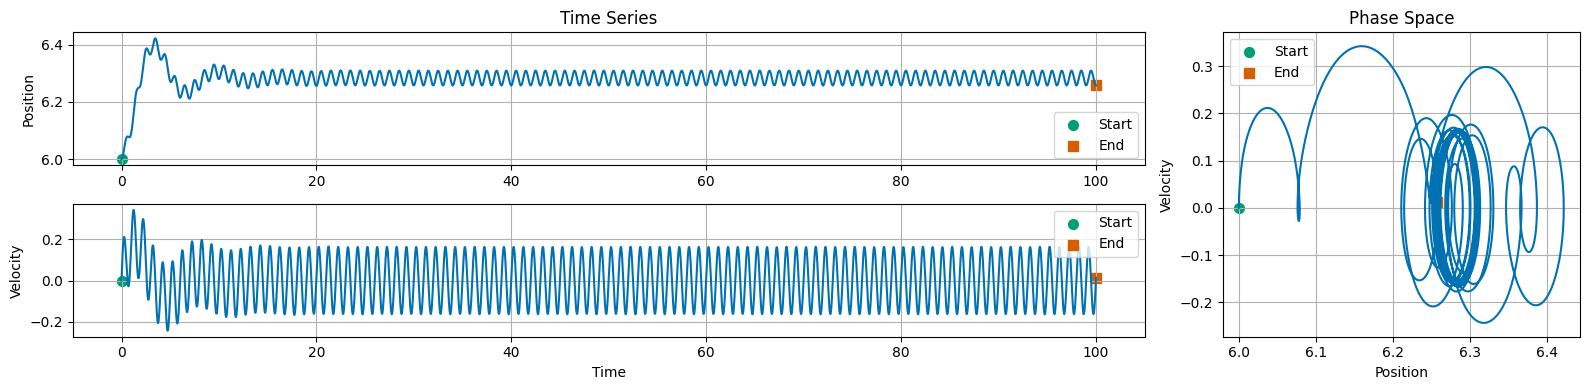

In [2]:
fig = plt.figure(figsize=(16, 4))
gs = gridspec.GridSpec(2, 2, figure=fig, height_ratios=[1, 1], width_ratios=[3, 1])


ax0 = fig.add_subplot(gs[0, 0])
ax0.plot(solution.t, solution.y[0])
plt.scatter(solution.t[0], solution.y[0][0], color='C1', marker='o', label='Start', s=50)
plt.scatter(solution.t[-1], solution.y[0][-1], color='C2', marker='s', label='End', s=50)
ax0.set_title('Time Series')
ax0.set_ylabel('Position')
ax0.legend()
ax0.grid()

ax1 = fig.add_subplot(gs[1,0])
ax1.plot(solution.t, solution.y[1])
plt.scatter(solution.t[0], solution.y[1][0], color='C1', marker='o', label='Start', s=50)
plt.scatter(solution.t[-1], solution.y[1][-1], color='C2', marker='s', label='End', s=50)
ax1.set_xlabel('Time')
ax1.set_ylabel('Velocity')
ax1.legend()
ax1.grid()

ax2 = fig.add_subplot(gs[:, 1])
ax2.plot(solution.y[0], solution.y[1])
ax2.set_title('Phase Space')
plt.scatter(solution.y[0][0], solution.y[1][0], color='C1', marker='o', label='Start', s=50)
plt.scatter(solution.y[0][-1], solution.y[1][-1], color='C2', marker='s', label='End', s=50)
ax2.set_xlabel('Position')
ax2.set_ylabel('Velocity')
ax2.legend()
ax2.grid()
plt.tight_layout()

What do you notice about the behavior of this system? Both short and long term? How can you see that in your plots?

**Your Answer Here**

### Investigating Periodicity

As you recall, the damped driven oscillator has two solutions - a transient solution that decays to zero, and a steady-state solution that is periodic. You can see in the above plot that the system starts with a transient solution, but eventually settles into a periodic solution.  Let's truncate the time to see the periodic solution more clearly. Let's look at the last 40 seconds of the simulation. We used `t_eval` to only evaluate the solution at 1000 points, between 0 and 100. We don't need to recalculate the solution, we can just plot the last 40 seconds of the solution we already calculated.

To check the periodicity, we investigate if the time series returns to the same value after a certain period. We can do this by plotting the time series after the transients have decayed. If the system is periodic, we should see a repeating pattern in the plot. Using the physics of the driver, we can plot a point at every period of the driver to see if the system returns to the same value, $T = \frac{2\pi}{\omega}$.

We do that below to demonstrate that after the transient solution decays, the system settles into a single periodic solution. 

One route to chaos is [period-doubling bifurcation](https://en.wikipedia.org/wiki/Period-doubling_bifurcation), where the system goes from a single period to two periods. You can see that we are not at that point yet, but the [Duffing oscillator](https://en.wikipedia.org/wiki/Duffing_equation) is a classic example of a system that exhibits period-doubling bifurcation. 

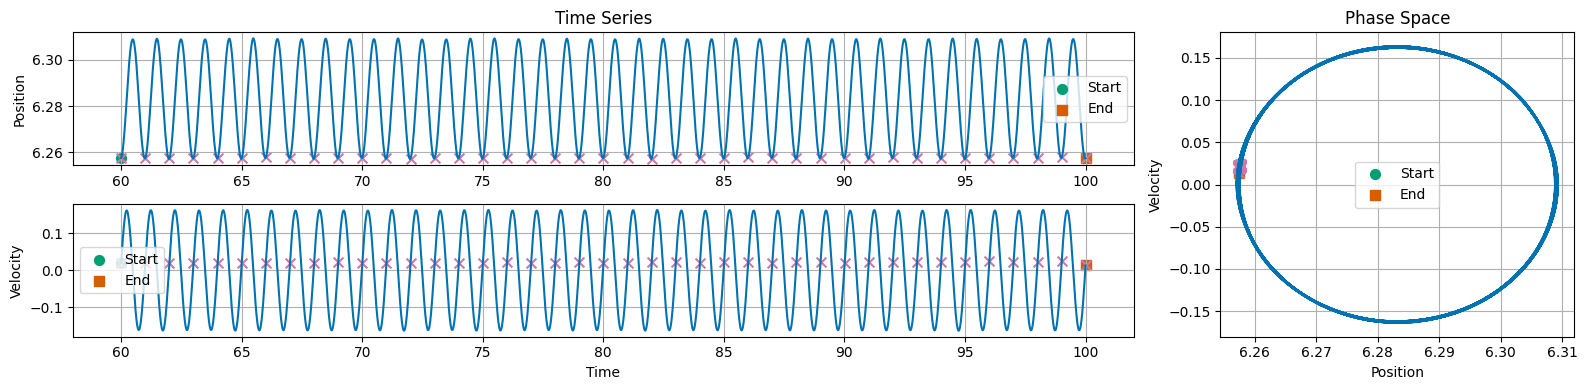

In [3]:
# Note this block runs the integration again but only returns the last 60 seconds of the simulation
startTime = 60
index = np.where(solution.t > startTime)[0][0]

solution_short_time = solution.t[index:]
solution_short_theta = solution.y[0][index:]
solution_short_omega = solution.y[1][index:]

# Indicies where solution repeats every 2pi/omegaD
period = 2*np.pi/omegaD
indices = np.where((solution_short_time % period) < 0.01)[0]


fig = plt.figure(figsize=(16, 4))
gs = gridspec.GridSpec(2, 2, figure=fig, height_ratios=[1, 1], width_ratios=[3, 1])


ax0 = fig.add_subplot(gs[0, 0])
ax0.plot(solution_short_time, solution_short_theta)
ax0.scatter(solution_short_time[0], solution_short_theta[0], color='C1', marker='o', label='Start', s=50)
ax0.scatter(solution_short_time[-1], solution_short_theta[-1], color='C2', marker='s', label='End', s=50)
ax0.scatter(solution_short_time[indices], solution_short_theta[indices], color='C3', marker='x', s=50)
ax0.set_title('Time Series')
ax0.set_ylabel('Position')
ax0.legend()
ax0.grid()

ax1 = fig.add_subplot(gs[1,0])
ax1.plot(solution_short_time, solution_short_omega)
ax1.scatter(solution_short_time[0], solution_short_omega[0], color='C1', marker='o', label='Start', s=50)
ax1.scatter(solution_short_time[-1], solution_short_omega[-1], color='C2', marker='s', label='End', s=50)
ax1.scatter(solution_short_time[indices], solution_short_omega[indices], color='C3', marker='x', s=50)
ax1.set_xlabel('Time')
ax1.set_ylabel('Velocity')
ax1.legend()
ax1.grid()

ax2 = fig.add_subplot(gs[:, 1])
ax2.plot(solution_short_theta, solution_short_omega)
ax2.set_title('Phase Space')
ax2.scatter(solution_short_theta[0], solution_short_omega[0], color='C1', marker='o', label='Start', s=50)
ax2.scatter(solution_short_theta[-1], solution_short_omega[-1], color='C2', marker='s', label='End', s=50)
ax2.scatter(solution_short_theta[indices], solution_short_omega[indices], color='C3', marker='x', s=50)
ax2.set_xlabel('Position')
ax2.set_ylabel('Velocity')
ax2.legend()
ax2.grid()
plt.tight_layout()

How does this view of the long term solution help us see the periodicity of the motion? How could we check if the motion follows the driving frequency?

**Your Answer Here**

### A Period-1 Solution

While the specific location of the marked points might vary a little but, we can see that there's roughly a repeated location of those points. In the case of position or velocity, the pink ex marks the spot where the system returns to the same value. The phase space makes that more clear because we can see that the system returns to the roughly the same point in phase space. This is close to a period-1 solution. It might be that we still have some transient behavior, or that our integrator is not perfectly accurate, or that our scheme for selecting the time points is not perfect, but we can see that the system is close to periodic.

We can use this approach to investigate other chaotic systems and explore their behavior over time.

## Period Doubling with the Duffing Oscillator

The Duffing oscillator is a non-linear second-order differential equation that describes the motion of a damped and driven oscillator with a non-linear restoring force. Under certain conditions, it can exhibit chaotic behavior, including period-doubling bifurcations. There are many routes to chaos, but period-doubling is a classic example.

The model is given by:

$$\frac{d^2x}{dt^2} + \delta \frac{dx}{dt} + \alpha x + \beta x^3 = \gamma \cos(\omega t)$$

We can rewrite this as a system of first-order ODEs by introducing a new variable for the velocity:

$$\dot{x} = v$$
$$\dot{v} = -\delta v - \alpha x - \beta x^3 + \gamma \cos(\omega t).$$

### Numerically Integrate the Duffing Oscillator

For our simulation we will observe the effect of the driving strength $\gamma$ on the behavior of the system. We start with the following parameters:

| Parameter | Value |
| --------- | ----- |
| $\delta$  | 0.2   |
| $\alpha$  | -1    |
| $\beta$   | 1     |
| $\gamma$  | 0.3   |
| $\omega$  | 1.2     |

Choose the initial conditions and time span for the simulation:
| Condition | Value |
| --------- | ----- |
| Initial $x$ | 1.0   |
| Initial $v$ | 0     |
| Time span | 100 cycles of the driver |
| Evaluation points | 10000 |

Below we've provided some of the code, but not the definition of the `duffing` function. You will need to write that function and fill in the missing code to complete the simulation.

**Write the rest of the code necessary to simulate the Duffing oscillator.**

**Plot the results of your simulation in the next cell.**

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from scipy.integrate import solve_ivp
plt.style.use('seaborn-v0_8-colorblind')

In [5]:
## def duffing(t, y, delta, alpha, beta, gamma, omega):
    ## Your Code Here

# Parameters
delta = 0.3
alpha = -1.0
beta = 1.0
gamma = 0.2
omega = 1.2

# Time span and initial conditions
cycles = 100
tfinal = 2 * np.pi * cycles / omega
t_span = (0, tfinal)
t_eval = np.linspace(t_span[0], t_span[1], 10000)
y0 = [1.0, 0.0]

# Solve the ODEs using solve_ivp
## Your Code Here

### Plotting the results

Once you have simulated the Duffing oscillator, you can plot the results to visualize its behavior over time. Your plot should be similar to the one above where you plot at least the position $x$ over time, and then a phase space plot of $x$ vs. $v$. Make sure that you label your axes and include a title for your plot; add starting and ending points to your plot so you are sure about the direction of the motion.

This first set of plots should look similar to the one below.

![Duffing](../images/notes/week10/first_duffing.png)

In [6]:
## Plot the time series and phase space
## Your Code Here

### Investigating Periodicity

Now that you have this solution, look at only the last few cycles of the simulation. You can do this by plotting only the last 10 cycles of the simulation. Include a mark at every cycle of the driver, $T = \frac{2\pi}{\omega}$. This will help you see if the system is periodic or not.

In [7]:
## Plot the time series and phase space
## Your Code Here

What did you find the periodicity of this particular set up to be? How did you determine it?

**Your Answer Here**

### Period Doubling

Let's use the same code, or write this code in a new cell, or write a new function, to investigate the effect of increasing the driving strength $\gamma$ on the behavior of the system. 

You will **run the code multiple times**, changing the value of $\gamma$ each time. You can do this by changing the value in the code, or by writing a loop to run through a range of values. In either case, you will need to plot the long term behavior of the system for each value of $\gamma$, including the phase space plot. Your plot should also include a mark at every cycle of the driver, $T = \frac{2\pi}{\omega}$.


For choices of $\gamma$, please use the following values: 0.2, 0.28, 0.29, 0.37, 0.50, 0.68, 0.74, 0.75, 

In [8]:
## Your Code Here

## Sensitivity to Initial Conditions with the Lorenz Attractor

The Lorenz attractor is a system of ordinary differential equations that model atmospheric convection. It is a classic example of a chaotic system that exhibits sensitive dependence on initial conditions. It also demonstrates the phenomenon of a [strange attractor](https://en.wikipedia.org/wiki/Strange_attractor). A strange attractor is a fractal structure in phase space that the system approaches asymptotically over time. For the Lorenz attractor, the strange attractor is a set of points in phase space that the system approaches as time goes to infinity - the butterfly shape that you might be familiar with. 

In this activity, we will simulate the Lorenz attractor using `solve_ivp` and explore how solutions diverge from each other based on small differences in initial conditions.

### Mathematical Model

The Lorenz model is given by:

$$\frac{dx}{dt} = \sigma (y - x)$$
$$\frac{dy}{dt} = x(\rho - z) - y$$
$$\frac{dz}{dt} = xy - \beta z$$

Where $\sigma$, $\rho$, and $\beta$ are system parameters. The canonical values are $\sigma = 10$, $\rho = 28$, and $\beta = \frac{8}{3}$.

### Numerically Integrate the Lorenz Attractor

In the cells below, we scaffold some of the code to simulate the Lorenz attractor. You will need to fill in the missing pieces. Once you plot the solution, you should be able to produce time series, and phase space plots of the Lorenz attractor. **Note that the phase space for the Lorenz attractor is 3D (x,y,z), so you will need to use a 3D plotting function or plot projections.**

For the parameters, we will use the canonical values of $\sigma = 10$, $\rho = 28$, and $\beta = \frac{8}{3}$. Choose initial conditions of $x=1$, $y=1$, and $z=1$ and simulate for 50 time units. If you do, your solution will look like the one below.

![Lorenz Time Series](../images/notes/week10/lorenz-1.png)

![Lorenz Phase Space](../images/notes/week10/lorenz-2.png)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from scipy.integrate import solve_ivp
plt.style.use('seaborn-v0_8-colorblind')

In [10]:
## def lorenz(t, y, sigma, beta, rho):
    ## Your Code Here

# Parameters for the Lorenz system
sigma = 10.0
beta = 8/3
rho = 28.0

# Time span and initial conditions
t_span = (0, 50)
t_eval = np.linspace(t_span[0], t_span[1], 10000)
y0 = [1.0, 1.0, 1.0]

# Solve the differential equations using solve_ivp
## Your Code Here

# Plotting your results
## Your Code Here

### Exploring Sensitivity to Initial Conditions

Noe that you have a solution to the Lorenz attractor, you can observe how trajectories that start from slightly different initial conditions diverge over time. This is a hallmark of chaotic systems, where small differences in initial conditions can lead to vastly different outcomes. We can visualize this as a bundle of trajectories that start from nearby points in phase space and then diverge over time. For the Lorenz attractor, this is often visualized as a butterfly-shaped structure in phase space.

For this activity, we will simulate the Lorenz attractor for two sets of initial conditions that are close together. We will then plot the trajectories in phase space to observe how they diverge over time.

**Modify the code you wrote above to simulate the Lorenz attractor for two sets of initial conditions that are close together. Plot the trajectories in phase space to observe how they diverge over time. Do this as both a time series and in phase space.**

In [11]:
## Your Code Here

### The Strange Attractor

The two trajectories that you plotted above should look like they are diverging over time. This is very common in chaotic systems. However, when you plot the trajectories in the phase space, they seem to occupy a bounded region of space - this is especially true as the trajectories evolve.

This bounded region is called a strange attractor. A strange attractor is a set of points in phase space that the system approaches asymptotically over time. For the Lorenz attractor, the strange attractor is a fractal structure that the system approaches as time goes to infinity.

Let's plot a ton of trajectories starting from different initial conditions to see the strange attractor. We can do this by looping over a range of initial conditions and plotting each trajectory in phase space. 

That will get very messy, so instead, let's integrate 100-1000 trajectories that are near the original trajectory. We will plot only the original and final location of each trajectory. This will give us a sense of the strange attractor without plotting every single trajectory.

In [12]:
## Your Code Here